<a href="https://colab.research.google.com/github/fuadalfaridzi/Last-Project-GDSC/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FUAD ALFARIDZI/220010115**

Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [ ]:
# Membaca data dari file yang telah di upload
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
# print 5 baris pertama dari dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print 5 baris terakhir dari dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# Mencari tahu jumah baris dan kolom
gold_data.shape

(2290, 6)

In [ ]:
# mendapatkan beberapa informasi dasar tentang data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# Menggunakan metode imputasi untuk mengecek nilai yang hilang
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# Mendapatkan beberapa informasi dasar tentang data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation = gold_data.corr()

<ipython-input-36-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

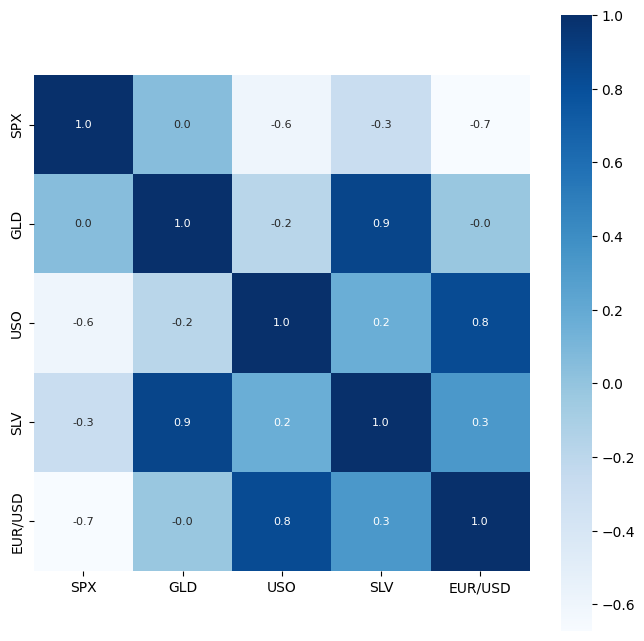

In [ ]:
# Membuat visualisasi dari kolerasi dengan heatmap
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# Nilai kolerasi dari GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-52-71f17a15a25c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='yellow')


<Axes: xlabel='GLD', ylabel='Density'>

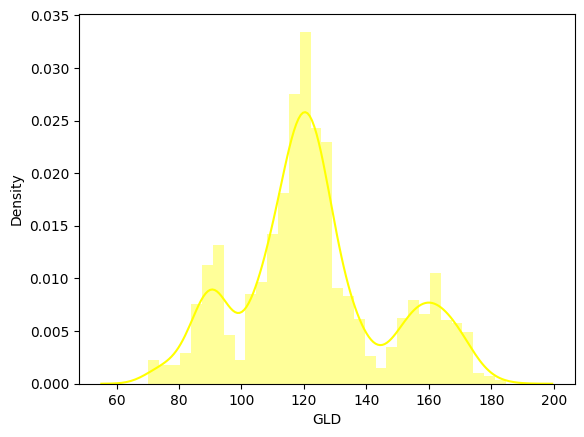

In [ ]:
# Memeriksa distribusi nilai GLD
sns.distplot(gold_data['GLD'],color='yellow')

Splitting the Features and Target

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.60689947  81.91240008 115.91170036 127.44530082 120.61170137
 154.76869737 150.06219855 126.20490013 117.56499877 126.05810048
 116.9043006  171.57340114 141.39119772 167.8133987  115.01499984
 117.78120082 140.6619022  169.78470064 159.28930304 161.63540016
 155.13799996 125.1528007  176.02329995 157.30910328 125.25030021
  93.69889968  77.12140035 120.4129001  119.15779929 167.37200041
  88.23310027 125.11459978  91.14590057 117.84249992 121.00369914
 136.1736011  115.43990121 115.3956008  147.12539934 107.3920013
 104.3483026   87.2541981  126.44970071 117.72559991 153.70979905
 119.62079998 108.48169945 108.13539819  93.07270013 127.17959795
  75.04280021 113.68149962 121.13089979 111.34309949 118.92359896
 120.58359958 158.93239893 168.14750152 146.96389707  86.08149889
  94.36130042  86.819899    90.55560032 118.99340066 126.42250053
 127.74220031 168.93249925 122.18859933 117.46819898  98.34800025
 168.19440185 143.00819906 132.01120263 121.2614022  120.9502994
 119.6416005

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

# R-squared = 0: Model regresi tidak menjelaskan variasi apa pun dalam data target. Ini berarti model tidak cocok sama sekali dengan data.
# R-squared = 1: Model regresi sempurna yang dapat menjelaskan semua variasi dalam data target. Ini berarti model cocok secara sempurna dengan data.
# 0 < R-squared < 1: Model regresi dapat menjelaskan sebagian variasi dalam data target. Semakin tinggi nilai R-squared, semakin baik model dalam menjelaskan variasi dalam data.

R squared error :  0.9896005159456721


Compare the Actual Values and Predicted Values in a Plot

In [ ]:
Y_test = list(Y_test) # Mengubah Y_test menjadi list

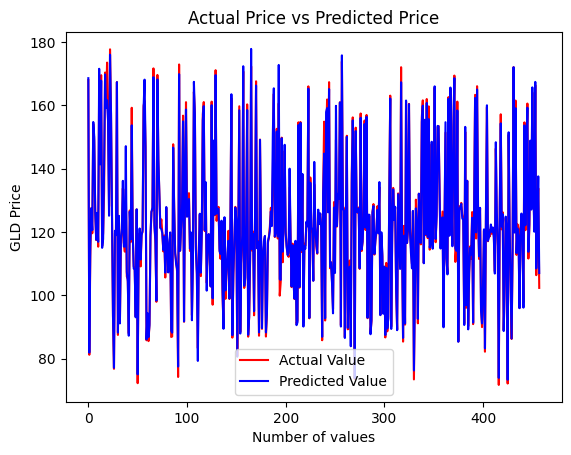

In [ ]:
# Memvisualisasikan perbandingan harga asli dengan harga prediksi
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()